<a href="https://colab.research.google.com/github/AmiraliSajadi/handson-ml2-code-note/blob/main/4_training_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4 - Training models
Knowing the math behind the different models or at least, knowing how they work can prove to be beneficial in that it helps you find the right model, right training algorithm and the right set of hyperparameters quicker and makes debugging and analysing errors much smoother for you.<br>
We are going to take a look at a few different models: Linear regression, Polynominal regression, Logistic regression and Softmax regression.

## Setup

In [ ]:
import numpy as np
import sklearn

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Linear Regression
**Normal Equation**: is the equation that helps us find the best theta directly<br>
To see how well it works we'll make a plot using a random linear function with some noise and then try to figure out the hyperparameters using the Normal Equation an see how well it performs.<br>
Remeber  that we write most vectors as column vectors. The dimensions here are generally worth more consideration so that you'd understand them well (refer to the book).


In [ ]:
# let's have 100 instances
X = 3 * np.random.rand(100, 1)
# add the random noise at the end to the y:
y = 3 + 4 * X + np.random.rand(100, 1)

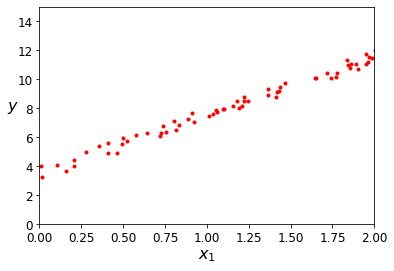

In [ ]:
plt.plot(X, y, "r.")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=16)
plt.axis([0, 2, 0, 15])
plt.show()

Let's go ahead and compute an approximation for 

In [ ]:
# to use x we first add a 1 to each instance for the constant
X_b = np.c_[np.ones((100, 1)), X]
# Normal Equation:
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta

array([[3.56793707],
       [3.98258516]])

The right answers were 3 & 4 but we got 3.6 and 3.9 which is acceptable. We can make a couple more predictions and put a line through them to have a visual sense of our predictions' accuracy:

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)
y_predict

array([[ 3.56793707],
       [11.53310738]])

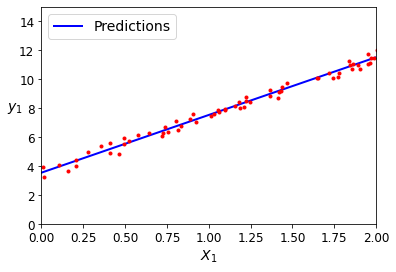

In [ ]:
plt.plot(X_new, y_predict, "b-", linewidth=2, label="Predictions")
plt.plot(X, y, "r.")
plt.xlabel("$X_1$", rotation=0, fontsize=14)
plt.ylabel("$y_1$", rotation=0, fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

You can perform linear regression with scikit-learn as well and it's quite easy. The calculations themselves differ in scikit-learn from what we have just done and that's briefly explained in pages 116-117 of the book, but here's the implementation code:

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
# Here are the two terms calculated approximately (coef is the feature weights)
lin_reg.intercept_, lin_reg.coef_

(array([3.56793707]), array([[3.98258516]]))

Same results. Now let's try to predict again:

In [ ]:
lin_reg.predict(X_new)

array([[ 3.56793707],
       [11.53310738]])

Scikit-learn's method involves using a technique called SVD which reduces the computational complexity from O^2.4-O^3 in normal equation to O^2 which is a significant difference. Although this is a big improvement, O^2 is still not very efficient but since both algorithms are linear with regard to memory complexity, they both handle big data sets with grace and an acceptable performance (plus after being trained they are pretty fast with making predictions!).

**Gradient Descent:** is the other way to train linear regression. Here's an implementation of batch gradient descent based on the formulas:

In [ ]:
eta = 0.1 # Learning rate
n_iterations = 1000
m = 100 # number of instances in training set

# We also need to initialize the theta to a random value
theta = np.random.rand(2, 1)

for iteration in range(n_iterations):
  gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradient

In [ ]:
theta

array([[3.56793707],
       [3.98258516]])

To find the ideal learning rate you can use a grid search and limit the number of itterations (beacause of time). To find the right number of itterations, one solution is to set it to something really high and then stop the process as the norm of gradient descent becomes smaller than a tiny number (almost becomming minimum).

**Stochastic Gradient Descent**: Things to remember:


*   It trains the model on a single random instance each itteration
*   It is therefore much faster
*   It is therefore more random
*   It's final product is usually good but not optimal
*   It's better at finding global minimum and getting out of local minima
*   We can use a technique called simulated annealing with wich we reduce the learning rate over time. Learning rate starts big and when we find the global min we start to reduce it. The function that determines learning rate is called learning schedule. It is crusial to reduce the learning rate at the right time and to the right amount to avoid getting stuck in local minima or never setteling for optimal minimum.

Here's the implementation of Stochastic Gradient Descent with a simple learning schedule:



In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

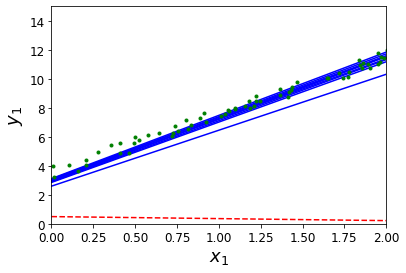

In [ ]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t1 + t)

theta = np.random.randn(2, 1)  # random initialization of theta

for epoch in range(n_epochs):
  for i in range(m):
    if epoch == 0 and i < 10:
      # in this if look we visualize the first few lines we create. pretty cool
      y_predict = X_new_b.dot(theta)
      style = "b-" if i > 0 else "r--"
      plt.plot(X_new, y_predict, style)
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients
    theta_path_sgd.append(theta)

plt.plot(X, y, "g.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y_1$", fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
theta

array([[3.55510974],
       [3.9996919 ]])

How to do it with scikit-learn? easy:<br>SGDRegressor class defaults to optimizing the squared error cost function until you hit the max number of itterations or the cost drops below the specified tolerance using the eta initially equal to 0.1 which changes with the default learning schedule (penalty is for regularization and we'll get back to it later):

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.56969676]), array([4.01793379]))

**Mni-batch gradient descent**: Trains on a portion of the training set in each iterations and as a result is much closer to the optimal minimum than SGC but not as good as batch GD. It also can take advantage of the hardware optimization (specially when using GPUs) that SGD just can't.<br>Here's the implementation:

In [ ]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1) # theta random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
  return t0 / (t1 + t)

t = 0
for epoch in range(n_iterations):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for i in range(0, m, minibatch_size):
    t += 1
    xi = X_b_shuffled[i:i+minibatch_size]
    yi = y_shuffled[i:i+minibatch_size]
    gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(t)
    theta = theta - eta * gradients
    theta_path_mgd.append(theta)

Here's a comparison between SGC and BGD, visualized for each step:

In [ ]:
theta

array([[3.54413928],
       [3.93390308]])

In [ ]:
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

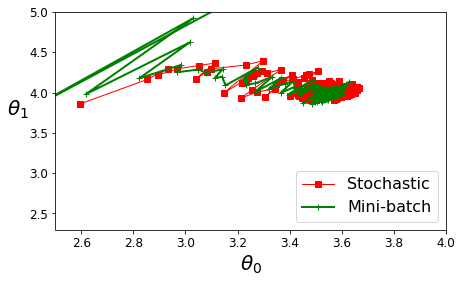

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.legend(loc="lower right", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4, 2.3, 5])
plt.show()

##Polynomial Regerssion
some data sets are too complex for a linear model. But we can still use some technique to make them work even with a linear model. One such technique is called Polynomial Regression in which we add powers of each feature as new features and then train a linear model on this extended set of features. simple!<br>Let's see it in action:

In [ ]:
# Generating nonlinear data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # nonlinear + noise

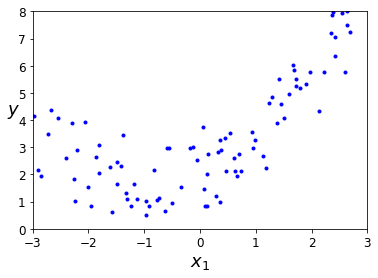

In [ ]:
# Visualizing the data
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", rotation=0, fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 8])
plt.show()

We can simply use scikit-learn's PolynominalFeatures to perform polynomial regression as follows:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

Now each element of X_poly contains the original value and that value squared:

In [ ]:
print("X[0]: ", X[0])
print("X_poly[0] :", X_poly[0])

X[0]:  [2.38942838]
X_poly[0] : [2.38942838 5.709368  ]


We are now ready to train a linear model on this extended data:

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

the actual values were 0.5, 1, 2<br>we got 0.5006, 1.003, 2.482 (Pretty nice)<br> Let's plot the predictions:

Text(0, 0.5, '$y$')

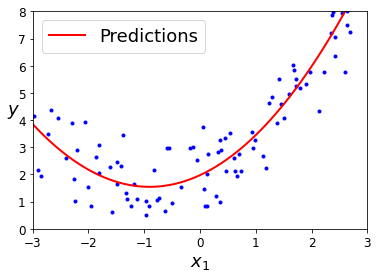

In [ ]:
# making predictions
X_new = np.linspace(-5, 4, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
# visualizing predictions
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.legend(loc="upper left", fontsize=18)
plt.axis([-3, 3, 0, 8])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

*Remember* that Polynomial Regression is capable of finding relations between features (unlike linear regression). Polynomial regression does this by using factorial in its calculations which can explode real quick, so beware of the degree *(more details in page 130 of the book)*. Take a look at a high degree polynomial regression:

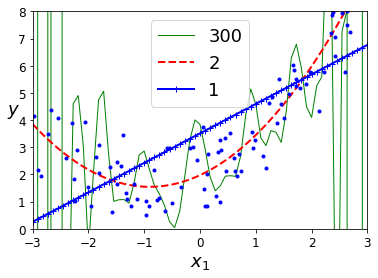

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("r--", 2, 2), ("b-+", 2, 1)):
  polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
  std_scalar = StandardScaler()
  lin_reg = LinearRegression()
  polynomial_regression = Pipeline([
      ("poly_features", polybig_features),
      ("standard_scalar", std_scalar),
      ("linear_regression", lin_reg),
  ])
  polynomial_regression.fit(X, y)
  # make new predictions
  y_newbig = polynomial_regression.predict(X_new)
  # add to plot
  plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

# visualize
plt.plot(X, y, "b.")
plt.legend(loc="upper center", fontsize=18)
plt.axis([-3, 3, 0, 8])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

Notice that in the above figure, the 300 degree model is overfitting.

**Learning Curve**
To determine wheather or not a model is overfitting or underfitting you can take a look at model's performance with training and validation set.<br>One other way is to plot learning curves which is a plot of the model's performance on training and test set as a function of the training set size (or the training iteration). The implementation is:

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  """plots the learning curve of the given model on the given data set"""
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, test_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X[:m], y[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val[:m])
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    test_errors.append(mean_squared_error(y_val[:m], y_val_predict))
  plt.plot(np.sqrt(train_errors), "b-", linewidth=2, label="train")
  plt.plot(np.sqrt(test_errors), "r--", linewidth=2, label="validation")
  plt.xlabel("Training set size", fontsize=14)
  plt.ylabel("RMSE", fontsize=14)
  plt.legend(loc="upper center", fontsize=16)
  plt.show()

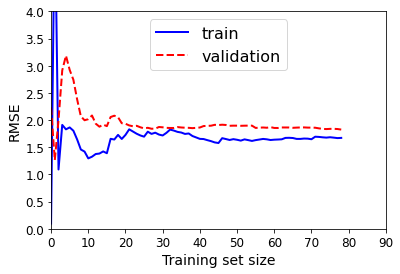

In [ ]:
lin_reg = LinearRegression()
plt.axis([0, 90, 0, 4])   
plot_learning_curves(lin_reg, X, y)

Looking at the above figure we can easily deduce from the gap between the training and validation RMSE and the plateau that the model in underfitting. Therefore, we need a more complex model that the used linear regression. Let's look at a 10th degree polynomial model's performance on the same data:

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())                                  
])

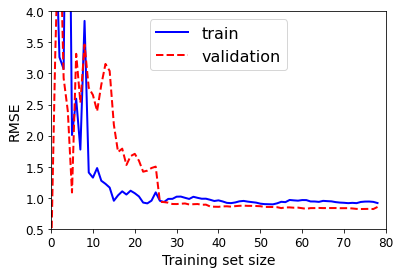

In [ ]:
plt.axis([0, 80, 0.5, 4])  
plot_learning_curves(polynomial_regression, X, y)

Looking at the figure above, we realize two important points:<br>1- The error on the training data is much lower.<br>2- There is a gap between the performance of the model on the training and the test set, and actually model is donig a much better job on the training set wihch means *overfitting*.


Bias/Variance Trade-off: errors come from these three:
*   Bias: Comes from assumptions(different from the bias in linear models). Higher the bias, model's more likely to underfit.
*   Variance: Due to model's excessive sensitivity to details. Higer the variance, higher the chances of model overfitting.
*   Irreducible error: Due to the noise of the data itself. One solution to deal with it is to clean the data.




## Regularized Linear Models:
These models implement regularization and constrain the weights.

***Ridge Regression:***<br>Adds a term to the cost function that includes theta and forces the model to keep the theta as small as possible. The term uses L2 norm.

In [ ]:
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [ ]:
from sklearn.linear_model import Ridge

# Ridge regression implementation - closed-form 
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.56411184]])

In [ ]:
# Ridge regression implementation - Gradient Descent #1
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.45666211])

In [ ]:
# Ridge regression implementation - Gradient Descent #2
ridge_reg = Ridge(alpha=1, solver="sag")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.56410013]])

***Lasso Regression:***<br>
just like Ridge regression adds a term to the cost function. but this time the added term includes L1 norm. Lasso eliminates theweights of the least important features (sets them to zero).<br>To avoid GD to bounce around the optimum point when using lasso make sure to gradually reduce the learning rate.<br>scikit-learn implementation:

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.58211786])

***Elastic Net:***<br>
A great middle ground between Ridge and Lasso. It's a mixture of both with a variable r to control it's behavior (r=0 is completely Ridge and r=1 is completely Lasso).

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.57473993])

Final Note:<br>You almost always need some extend of regularization.<br>Ridge is a good start but if you suspect that only few features are important opt to ElasticNet and experiment with that as Lasso itself can act radically in some situations.

#Early Stopping
stop training the model when the validation error reaches a minimum.<br>Here's an implementation(there are more automated ways to do it):

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [ ]:
from sklearn.base import clone

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [ ]:
print("best epoch: ", best_epoch)
print("best model: ", best_model)

best epoch:  198
best model:  SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)


#Logistic Regression : Decision Boundaries (Iris)

In [ ]:

from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# checking what data is like
iris["data"][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
X = iris["data"][:, 3:]  # 4th number (petal width)
y = (iris["target"] == 2).astype(np.int)  # third type (Iris-Virginica)

In [ ]:
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (150, 1)
y shape:  (150,)


In [ ]:
print("X[122]: ", X[122])
print("y[122]: ", y[122])

X[122]:  [2.]
y[122]:  1


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

making up data to predict on:

In [ ]:
X_madeup = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_madeup)

print(y_proba)
print("\nshape: ", y_proba.shape)

[[9.99250016e-01 7.49984089e-04]
 [9.99240201e-01 7.59799387e-04]
 [9.99230257e-01 7.69743043e-04]
 ...
 [3.08374822e-03 9.96916252e-01]
 [3.04400296e-03 9.96955997e-01]
 [3.00476842e-03 9.96995232e-01]]

shape:  (1000, 2)


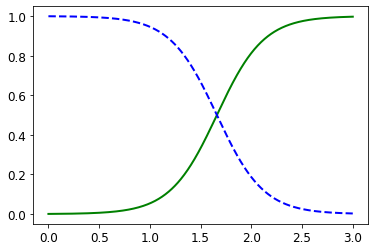

In [ ]:
plt.plot(X_madeup, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_madeup, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

decision boundary is about 1.6

In [ ]:
log_reg.predict([[1.5], [1.7]])

array([0, 1])

# Softmax Regression

In [ ]:
X = iris["data"][:, (2, 3)] # petal length and width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])